[-0.29999018 -0.79999924]
7.594146366685469e-05
20


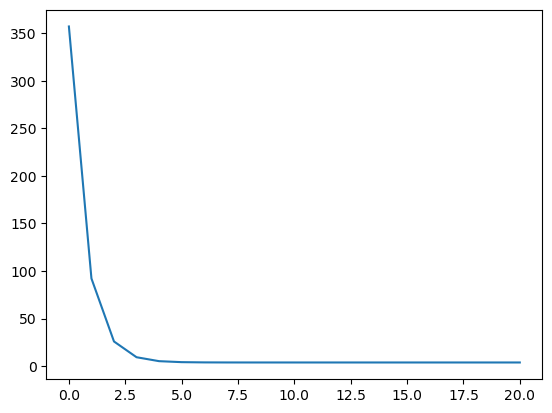

In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d



def myFun(w):
    return (3*(w[0]**2+w[1]**2) + 4*w[0]*w[1] + 5*w[0] + 6*w[1] + 7)

def gradFun(w):
    return np.array([6*w[0] + 4*w[1] + 5, 6*w[1] + 4*w[0]+6])

#def oneDFun(alpha):
#    return myFun(x + alpha*dk)


iterate = np.array([10, 0])  #initial iterate
historyIter = [iterate]
historyFun=[myFun(iterate)]
maxIter=100
tol=0.0001
k=0



N = len(iterate)

#I = np.eye(N, dtype=int) # Identity matrix I of size NxN.
#Bk = I   # Set the first iteration matrix for BFGS


grad=gradFun(iterate)
#H = np.matrix('6 4; 4 6')    constant Hessian matrix
H = [[6, 4], 
    [4, 6]]


while  (la.norm(gradFun(iterate)) > tol) and (k <= maxIter):
#for i in range(maxIter):
     b = -gradFun(iterate)    
     dk = np.linalg.solve(H,b)  # determine the search direction
        
     #dk = -Bk*gradFun(iterate)  # when using the DFP update in QN Method
     ################ constant step length 
     next_iterate = iterate + 0.5* dk  # constant alpha
           
     ############# List for Plotting function values ###########  
     historyIter.append(next_iterate)
     funValue=myFun(next_iterate)
     historyFun.append(funValue)
     ######## update iteration counter and the new iterate
     k=k+1
     iterate=next_iterate
        
       


############# after the termination of the algorithm #############
print(iterate)
grad=gradFun(iterate)
print(la.norm(grad))
print(k) # number of iteration until termination

functionValues = np. array(historyFun)
functionValues = functionValues.flatten()
n=len(functionValues)

x=range(n)
pt.plot(x, historyFun)